Nombre: Melina Villada López
CC 1007285792

4. Definir la frecuencia de muestreo para la siguiente señal y obtener las muestras de 10
segundos de la señal usando Colab (10%)

x(t)= 4 ∗cos(80πt + (π /4))+ k ∗ sin(40πt)+ 5 Con k = 2(a+1) con a = 2, k =6

La señal contiene dos componentes oscilatorias:
1. 4 ∗cos(80πt + (π /4)) tiene una frecuencia angular de  80π rad/s, lo que corresponde a una frecuencia 𝑓1=80𝜋/2𝜋=40 Hz
2. 6 ∗ sin(40πt) tiene una frecuencia angular de 40π rad/s, lo que corresponde a una frecuencia 𝑓2=40𝜋/2𝜋=20 Hz
Según el criterio de Nyquist, la frecuencia de muestreo debe ser al menos el doble de la frecuencia más alta presente en la señal para evitar el aliasing. La frecuencia más alta en esta señal es 40 Hz, or lo tanto, la frecuencia de muestreo mínima es: 

​fs=2×40 Hz=80 Hz, para obtener mejor resolución lo hare con una frecuencia de 100 Hz

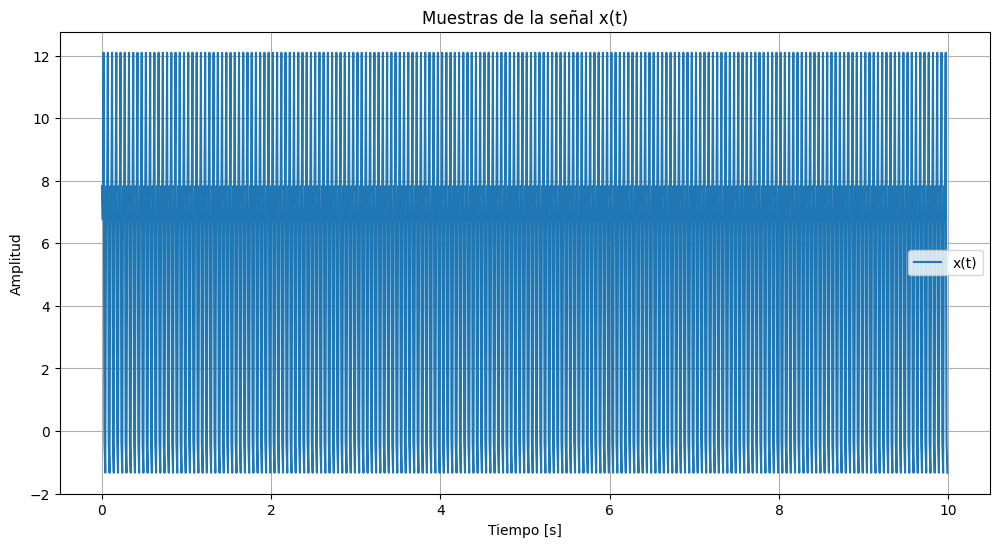

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Parámetros de la señal
k = 6 
f1 = 40  # Frecuencia en Hz para la componente de coseno
f2 = 20  # Frecuencia en Hz para la componente de seno
T = 10  # Duración en segundos

# Frecuencia de muestreo
fs = 100  # Frecuencia de muestreo en Hz
ts = 1 / fs  # Intervalo de muestreo

# Vector de tiempo
t = np.arange(0, T, ts)

# Definición de la señal
x_t = 4 * np.cos(80 * np.pi * t + (np.pi / 4)) + k * np.sin(40 * np.pi * t) + 5

# Graficar la señal
plt.figure(figsize=(12, 6))
plt.plot(t, x_t, label='x(t)')
plt.xlabel('Tiempo [s]')
plt.ylabel('Amplitud')
plt.title('Muestras de la señal x(t)')
plt.legend()
plt.grid(True)
plt.show()


Para terminos visuales, lo graficare en un tiempo de 1 segundos

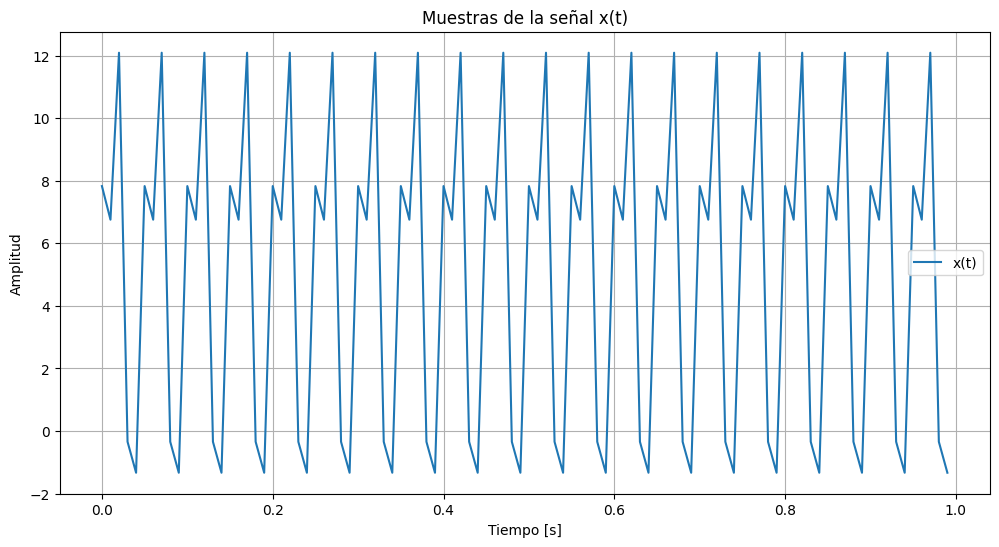

In [9]:

T = 1  # Duración en segundos (ajustado a 2 segundos)

# Frecuencia de muestreo
fs = 100  # Frecuencia de muestreo en Hz
ts = 1 / fs  # Intervalo de muestreo

# Vector de tiempo
t = np.arange(0, T, ts)

# Definición de la señal
x_t = 4 * np.cos(80 * np.pi * t + (np.pi / 4)) + k * np.sin(40 * np.pi * t) + 5

# Graficar la señal
plt.figure(figsize=(12, 6))
plt.plot(t, x_t, label='x(t)')
plt.xlabel('Tiempo [s]')
plt.ylabel('Amplitud')
plt.title('Muestras de la señal x(t)')
plt.legend()
plt.grid(True)
plt.show()


5. Programar el periodograma de Welch (NO usar la función de scipy) mediante una función
que:
A) reciba la señal x y haga la partición de la misma usando M muestras por segmento y S muestras
de solapamiento (5%)

Para implementar el periodograma de Welch según los pasos detallados, seguiremos estos pasos:

* Partir la señal en segmentos de longitud 𝑀 con S muestras de solapamiento.
* Aplicar una ventana de Blackman a cada segmento.
* Calcular la Transformada Discreta de Fourier (DFT) de cada segmento enventanado.
* Obtener el periodograma modificado de cada segmento.
* Promediar los periodogramas modificados.

In [12]:
import numpy as np
import matplotlib.pyplot as plt

def welch_periodogram(x, M, S, fs):
    # Crear una ventana de Blackman
    window = np.blackman(M)
    # Número de segmentos
    num_segments = int(np.ceil((len(x) - S) / (M - S)))
    # Inicializar la densidad espectral de potencia (PSD)
    psd = np.zeros(M)
    
    for i in range(num_segments):
        # Definir los índices del segmento
        start = i * (M - S)
        end = start + M
        
        # Asegurarse de que el segmento esté completo
        if end > len(x):
            break
        
        # Extraer el segmento
        segment = x[start:end]
        
        # Aplicar la ventana
        windowed_segment = segment * window
        
        # Calcular la FFT del segmento
        fft_segment = np.fft.fft(windowed_segment, n=M)
        
        # Calcular el periodograma modificado del segmento
        periodogram = (np.abs(fft_segment) ** 2) / (M * np.sum(window ** 2))
        
        # Acumular el periodograma
        psd += periodogram
    
    # Promediar el periodograma
    psd /= num_segments

    # Frecuencias correspondientes
    freqs = np.fft.fftfreq(M, d=1/fs)

    # Tomar solo la mitad positiva del espectro
    half_range = M // 2
    return freqs[:half_range], psd[:half_range]






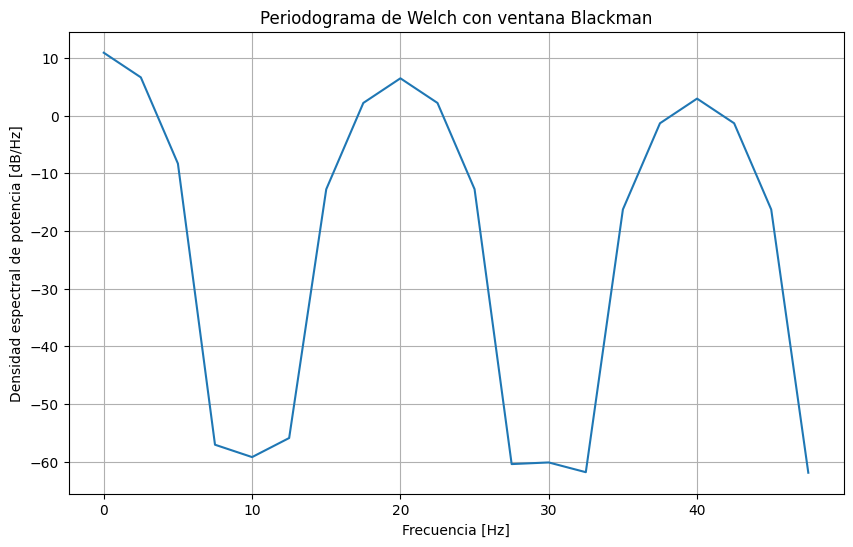

In [ ]:
# Parámetros de la señal
k = 6
T = 2  # Duración en segundos
fs = 100  # Frecuencia de muestreo en Hz
ts = 1 / fs  # Intervalo de muestreo

# Vector de tiempo
t = np.arange(0, T, ts)

# Definición de la señal
x_t = 4 * np.cos(80 * np.pi * t + (np.pi / 4)) + k * np.sin(40 * np.pi * t) + 5

# Parámetros del periodograma de Welch
M = 40  # Número de muestras por segmento
S = 15  # Número de muestras de solapamiento

# Calcular el periodograma de Welch
freqs, psd = welch_periodogram(x_t, M, S, fs)

# Graficar el periodograma
plt.figure(figsize=(10, 6))
plt.plot(freqs, 10 * np.log10(psd))
plt.xlabel('Frecuencia [Hz]')
plt.ylabel('Densidad espectral de potencia [dB/Hz]')
plt.title('Periodograma de Welch con ventana Blackman')
plt.grid(True)
plt.show()